In [32]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
from keras.models import Model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from keras.applications.vgg16 import preprocess_input

In [33]:
# load the model
model = VGG16()

In [34]:
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

In [35]:
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

In [36]:
# get feature map for first hidden layer
feature_maps = model.predict(img)

1/1 [==============================] - 0s 376ms/step


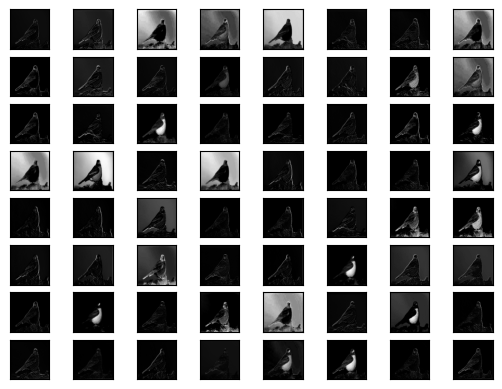

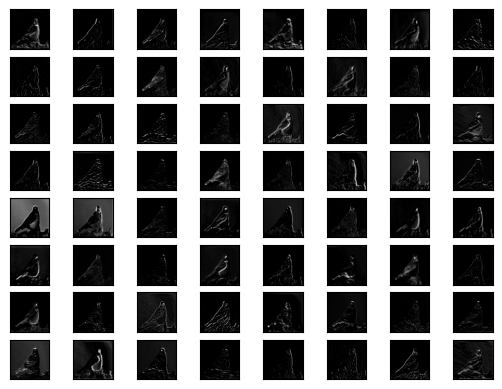

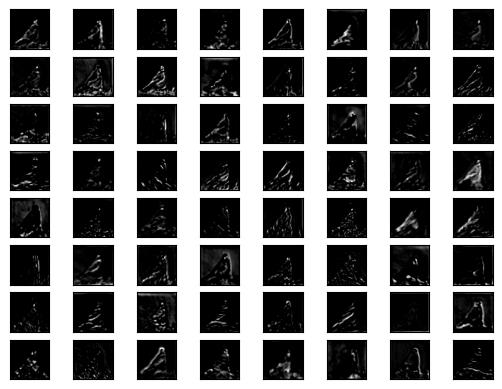

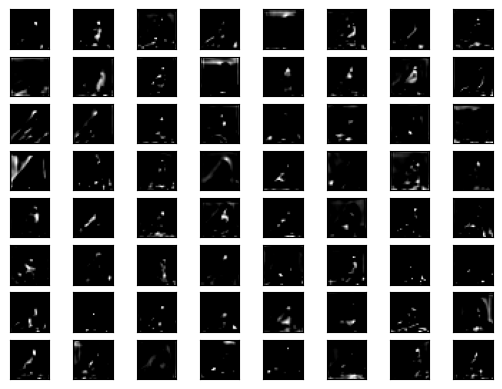

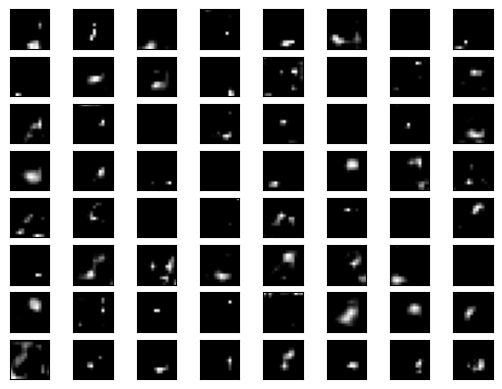

In [37]:
# plot all 64 maps in an 8x8 squares
square = 8
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    # show the figure
    pyplot.show()